In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [5]:
data = np.loadtxt('SCP.txt',usecols=(1,2,3))

In [6]:
z = data[:,0]
mu = data[:,1]
sig = data[:,2]

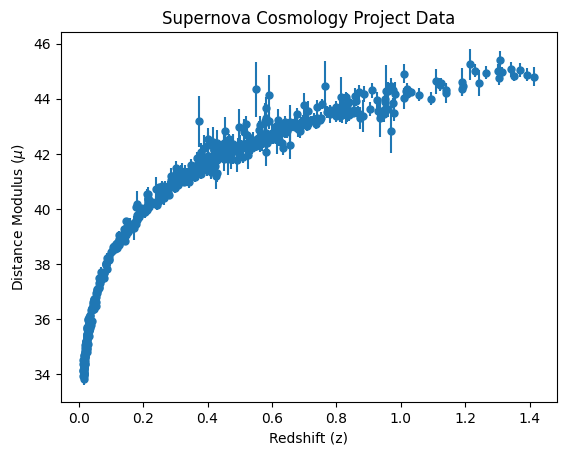

In [15]:
plt.errorbar(z,mu,yerr=sig,fmt='o',markersize=5)
plt.xlabel('Redshift (z)')
plt.ylabel(r'Distance Modulus ($\mu$)')
plt.title('Supernova Cosmology Project Data')
plt.show()

In [48]:
#------Distance calculations------#

c = 3.0e5     ## km/sec
H_0 = 72.0    ## km/sec/Mpc

## 1/E(r)

def E_inv(z, om_m, om_r):
    om_l = 1 - om_m - om_r     ## Considering a flat Universe
    return 1.0 / np.sqrt(om_r * (1+z)**4 + om_m * (1+z)**3 + om_l)

def com_dist(z, om_m, om_r):
    integral, _ = quad(E_inv, 0, z, args=(om_m, om_r))
    return (c / H_0) * integral

def lum_dist(z, om_m, om_r):
    return com_dist(z, om_m, om_r) * (1 + z)

In [66]:
def mu_theory(z, om_m, om_r):
    dL = lum_dist(z, om_m, om_r)
    return 5*np.log10(dL) + 25

In [67]:
z1 = np.linspace(np.min(z),np.max(z),100)

In [77]:
def mu_theory_array(z_array, om_m, om_r):
    mu_vals = np.zeros_like(z_array)
    for i, z in enumerate(z_array):
        mu_vals[i] = mu_theory(z, om_m, om_r)  # calls quad internally
    return mu_vals

In [78]:

##------Case 1 : Om = 0.1-----------##

mu1 = mu_theory_array(z1, 0.1, 0.00001)

##------Case 2 : Om = 0.3-----------##

mu2 = mu_theory_array(z1, 0.3, 0.00001)

##------Case 3 : Om = 0.5-----------##

mu3 = mu_theory_array(z1, 0.5, 0.00001)

##------Case 4 : Om = 0.7-----------##

mu4 = mu_theory_array(z1, 0.7, 0.00001)

##------Case 5 : Om = 0.9-----------##

mu5 = mu_theory_array(z1, 0.9, 0.00001)


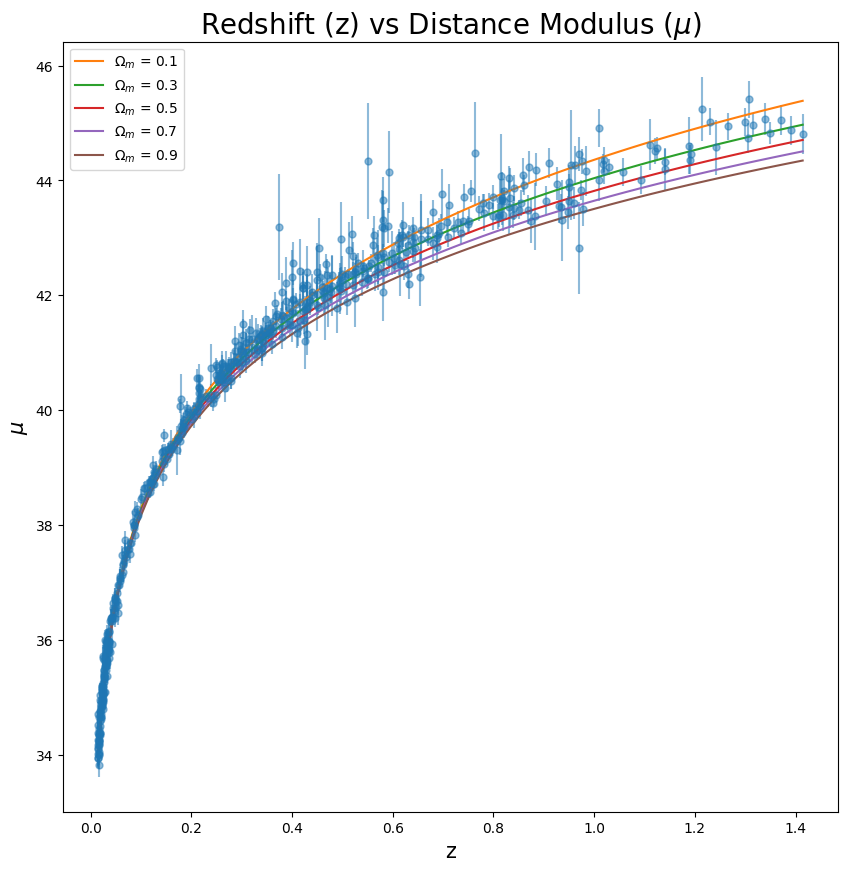

In [99]:
plt.figure(figsize=(10,10))
plt.errorbar(z,mu,yerr=sig,fmt='o',markersize=5,alpha = 0.5)
plt.plot(z1,mu1,label=f'$\\Omega_m$ = 0.1')
plt.plot(z1,mu2,label=f'$\\Omega_m$ = 0.3')
plt.plot(z1,mu3,label=f'$\\Omega_m$ = 0.5')
plt.plot(z1,mu4,label=f'$\\Omega_m$ = 0.7')
plt.plot(z1,mu5,label=f'$\\Omega_m$ = 0.9')
plt.xlabel('z',size=15)
plt.ylabel('$\\mu$',size=15)
plt.title('Redshift (z) vs Distance Modulus ($\\mu$)', size = 20)
plt.legend()
plt.show()

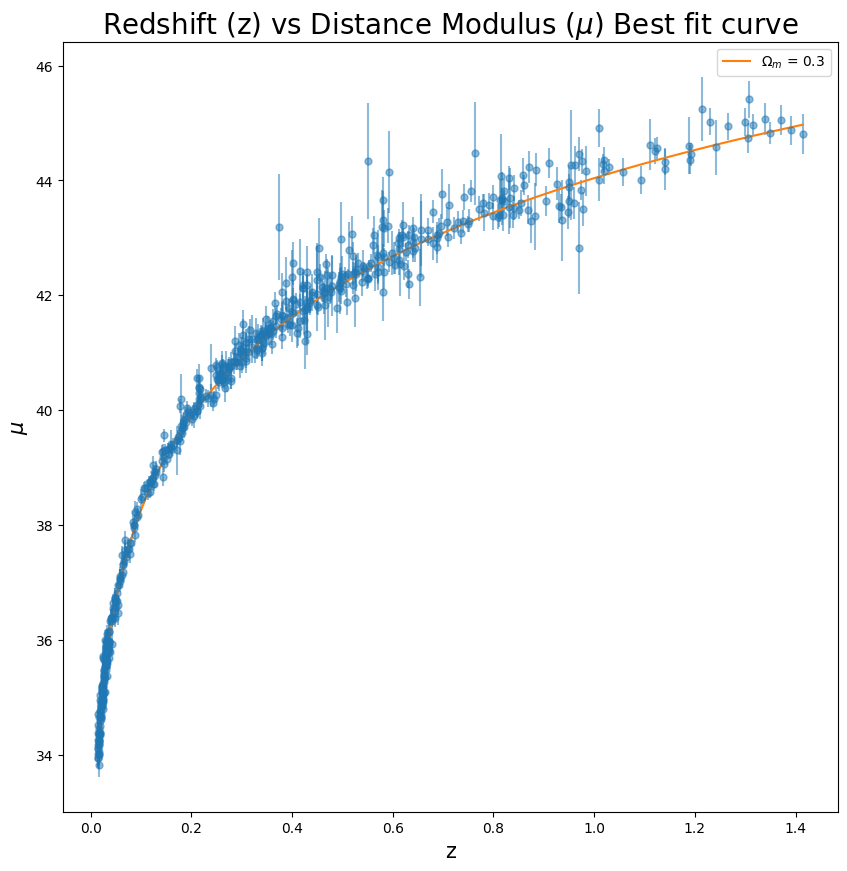

In [98]:
plt.figure(figsize=(10,10))
plt.errorbar(z,mu,yerr=sig,fmt='o',markersize=5,alpha=0.5)
plt.plot(z1,mu2,label=f'$\\Omega_m$ = 0.3')
plt.xlabel('z',size=15)
plt.ylabel('$\\mu$',size=15)
plt.title('Redshift (z) vs Distance Modulus ($\\mu$) Best fit curve',size=20)
plt.legend()
plt.show()

In [102]:
##---------Om_l------------##

Om_l = 1-0.3-0.00001
print(f'The value of Om_l is', {Om_l})

The value of Om_l is {0.69999}


## Results

Assuming a spatially flat Universe ($\Omega_k = 0$), consistent with current cosmological observations:

- Matter density: $\Omega_m = 0.3$`
  
- Dark energy density: $\Omega_\Lambda = 0.699$`

- Radiation density: $\Omega_r = 1 \times 10^{-4}$`

These values reproduce the standard ΛCDM model. 